The best fit parameters from the built in numpy polyfit:
 a =  3119999.9999999995 
 b =  -0.3999999999999828
The uncertainty in a is 100664.45913694342


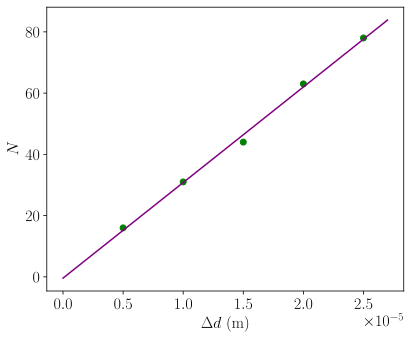

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time 

# for vector graphics instead of pngs
%config InlineBackend.figure_format = 'svg'

# For tex fonts and math-mode in figures
plt.rcParams['text.latex.preamble']=r'\usepackage{lmodern}'
params = {'text.usetex':True,'font.size':16,'font.family':
          'serif','figure.autolayout': True}
plt.rcParams.update(params)

distance = [0.000005, 0.00001, 0.000015, 0.000020, 0.000025]
number_of_fringes = [16, 31, 44, 63, 78]
x_error = 0.000000009

numpyParam = np.polyfit(distance, number_of_fringes, 1, cov='True')

parameter_array = numpyParam[0]

covariance_matrix = numpyParam[1]
error_in_a = np.sqrt(covariance_matrix[0,0])


a = parameter_array[0]
b = parameter_array[1]
print('The best fit parameters from the built in numpy polyfit:\n a = '
      , a , '\n b = ', b)
print("The uncertainty in a is", error_in_a )


x = np.linspace(0, 0.000027, 100)
y = a*x + b


plt.figure(figsize=(6,5))
plt.plot(distance, number_of_fringes, 'o', color="green")
plt.errorbar(distance, number_of_fringes, xerr = x_error, fmt=' ')
plt.xlabel('$\Delta d$ (m)')
plt.ylabel('$N$')
plt.plot(x,y, color="purple")
plt.savefig(fname="wavelengthplot.svg")
plt.show()

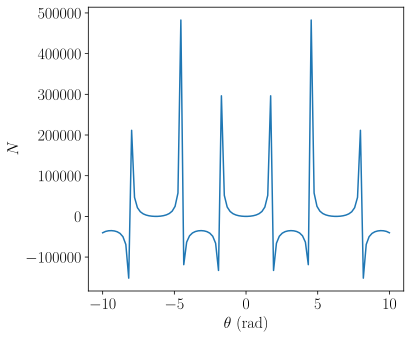

In [8]:
theta = np.linspace(-10, 10, 100)
k = 70000
n = 1.2
N = k*( 1 + ( (n * np.cos(theta)) / (1 - n - np.cos(theta) )  ) )
plt.figure(figsize=(6,5))
plt.plot(theta, N)
plt.xlabel('$\\theta$ (rad)')
plt.ylabel('$N$')
plt.savefig(fname="Nthetaplot.svg")
plt.show()